<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/03_linear_regression/3_linear_regression_oefeningen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

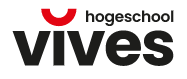<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# LINEAR REGRESSION: OEFENINGEN

In deze reeks van oefeningen gaan we stap voor stap het **Stochastic Gradient Descent** algoritme implementeren om lineaire regressie toe te passen op een heel eenvoudige dataset. Op het einde volgen nog enkele oefeningen met datasets uit het échte leven en daarop zullen we ook de Scikit-Learn klasse voor lineaire regressie op toepassen.

## Een eenvoudig voorbeeld

Zoals gezegd beginnen we met een heel eenvoudige dataset met huisprijzen. Je mag dat gerust de 'hello world' van de regressie in machine learning noemen...

### Oefening 1

Lees de file `"huizen1.csv"` in als Pandas `DataFrame`, verken de data en plot de gegevens uit in een scatterplot (`x = 'num_rooms'` en `y = 'price'`).

Definieer dan een functie `calculate_price()` die de volgende formule implementeert:

```python
price = 100 + 50 * num_rooms
```

De inputparameter is dus het aantal kamers `num_rooms`, de returnwaarde van de functie is de prijs `price`.

Gebruik je functie om de prijs te berekenen van een huis met 4 kamers. Voeg dit voorbeeld toe aan het dataframe en maak een nieuwe scatterplot met adhv dit uitgebreide dataframe.

## Een tweede probleem

De vorige oefening was natuurlijk heel simpel.
Laten we nu naar een gelijkaardige maar iets realistischer dataset kijken (hoewel die nog steeds zeer eenvoudig is...)

### Oefening 2

Lees de file `"huizen2.csv"` in als Pandas `DataFrame`, verken opnieuw de data en plot de gegevens uit in een scatterplot (`x = 'num_rooms'` en `y = 'price'`).

De tabel bevat nu wel een rij voor een huis met 4 kamers, maar bij de prijs zie je nu `NaN` staan, wat "Not-a-Number" betekent en dus wil zeggen dat de prijs niet gekend is. Bij het plotten wordt deze rij automatisch overgeslagen.

Vervang de `NaN`-waarde in je dataframe door de prijs die je met de functie `calculate_price()` hebt berekend. Maak opnieuw een scatterplot met het aangepaste dataframe.

Probeer de `NaN`-waarde op een slimme manier te vervangen door bijvoorbeeld gebruik te maken van boolean indexing.

## Een eerste algoritme

In machine learning is het de bedoeling om een **algoritme** op de data toe te passen dat resulteert in een **model** waarmee we de prijs kunnen voorspellen van een huis met om het even welk aantal kamers. Laten we nu eens stap voor stap zo'n algoritme uitwerken!

### Oefening 3

We beginnen met eerst zelf een model te definiëren waarmee we voorspellingen (**predicties**) kunnen maken over de prijs van een huis. De huisprijs is dus de **target**. In feite hebben we in de voorgaande oefeningen al zo'n model gedefinieerd om die prijs te voorspellen a.d.h.v. slechts één **feature**, nl. het aantal kamers. Hier gaan we dat model uitbreiden zodat het de voorspelling baseert op 3 features: niet alleen het aantal kamers, maar ook een basisprijs en de prijs per kamer.

Definieer een functie `predict_price()` die als inputparameters `base_price`, `price_per_room` en `num_rooms` heeft. De output is de prijs (`price`) die als volgt wordt berekend:

```python
price = base_price + price_per_room * num_rooms
```

Werkt je functie ook met NumPy arrays? Test dit uit!


### Oefening 4

Dit model geeft op het eerste gezicht al vrij nauwkeurige voorspellingen, maar machine learning gaat over het toepassen van algoritmen die 'leren uit de data', en dus is het niet de bedoeling dat we zelf modellen gaan 'uitvinden'.

Concreet willen we hier dus een algoritme ontwikkelen dat een model creëert om voorspellingen te maken van de prijs van huizen waarbij die *voorspellingen zo dicht mogelijk liggen bij de prijzen uit onze dataset*. We moeten dus een **supervised learning** algoritme ontwikkelen omdat de dataset al voorbeelden bevat van onze target, nl. de prijs van de huizen.

We starten met een eenvoudige truc toe te passen: we passen de features een klein beetje aan naargelang de gegeven prijs groter of kleiner is dan de voorspelde prijs.

Definieer een functie `simple_trick()` die het volgende algoritme in pseudocode omzet naar Python code:

```
Case 1: If the price of the house is higher than the price the model predicted, and the
number of rooms is positive:
- Add 1 cent to the price per room
- Add 1 cent to the base price.

Case 2: If the price of the house is higher than the price the model predicted, and the
number of rooms is negative:
- Subtract 1 cent to the price per room
- Add 1 cent to the base price.

Case 3: If the price of the house is lower than the price the model predicted, and the
number of rooms is negative:
- Add 1 cent to the price per room
- Subtract 1 cent to the base price.

Case 4: If the price of the house is lower than the price the model predicted, and the
number of rooms is positive:
- Subtract 1 cent to the price per room
- Subtract 1 cent to the base price.

```

De inputparameters van de functie zijn: `base_price`, `price_per_room`, `num_rooms`, `price` en `step`. De laatste parameter zet je default op 0.01, wat overeenkomt met die 1 cent uit het algoritme hierboven. De output is een tuple met de aangepaste `base_price` en `price_per_room`. Maak gebruik van de functie `predict_price()` uit de vorige oefening en test je code uit!

*Opmerking*: In realiteit kan het aantal kamers nooit negatief zijn, maar wiskundig gezien kan dit wel, en dus moeten we ook rekening houden met die onrealistische cases 2 en 3. Onderstaande figuur beeldt dit mooi uit.

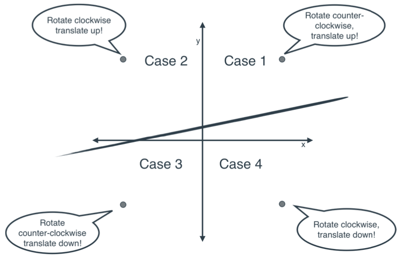

### Oefening 5

De volgende stap bestaat erin om een eenvoudig algoritme te implementeren dat gebruik maakt van onze 'simple trick' uit de vorige oefening.

Definieer een functie `simple_algorithm()` die een dataframe als input krijgt met kolommen `num_rooms` en `price`. Deze functie heeft ook nog `num_iterations` als inputparameter en `step` die standaard 0.01 is. De functie bepaalt eerst een random `base_price` en `price_per_room`. Daarna past het `num_iterations` keer deze `base_price` en `price_per_room` aan door de functie `simple_trick` uit de vorige oefening aan te roepen. De `num_rooms` en `price` inputargumenten voor deze functie worden uit het dataframe gehaald, waarbij in elke iteratie willekeurig een voorbeeld (record of rij) uit dit dataframe wordt geselecteerd.



Pseudocode:
```
0. Initialisatie: start met willekeurige waarden voor de basisprijs en de prijs per kamer

1. Iteraties: herhaal veelvuldig
  - kies een willekeurig huis
  - gebruik dit datapunt om de basisprijs en prijs per kamer aan te passen
    zodat het model de prijs van het huis beter voorspelt

2. Output: geef de uiteindelijke basisprijs en prijs per kamer terug
```

Pas de functie toe op de dataset uit `'huizen2.csv'`.

Maak een plot van de regressielijn die het algoritme gevonden heeft. Plot ook duidelijk de intercept!

## Een beter algoritme

Ons naïef algoritme werkt al redelijk goed, maar we kunnen beter, want we kunnen een wiskundige 'truc' toepassen en de parameters aanpassen a.d.h.v. de gradiënt!

### Oefening 6

Definieer een functie `delta_trick()` die hetzelfde doet als de functie `simple_trick()`, maar de parameters als volgt aanpast:

```
1) delta = (learning_rate) * (price - prediction)
2) delta2 = delta * num_rooms
3) price_per_room += delta2
4) base_price += delta
```

De inputparameters van de functie zijn dus: `base_price`, `price_per_room`, `num_rooms`, `price` en `learning_rate`. De laatste parameter zet je default op 0.01, en komt dus overeen met `step`, wat die 1 cent is uit het vorige algoritme. De output is een tuple met de aangepaste `base_price` en `price_per_room`.

Maak gebruik van de functie `predict_price()` uit de vorige oefening en test je code uit!

### Oefening 7

Definieer nu een functie `better_algorithm()` dat hetzelfde doet als de functie `simple_algorithm()`, maar de `delta_trick()` functie toepast i.p.v. `simple_trick()`. De functie krijgt dus een dataframe als input met kolommen `num_rooms` en `price`. De functie heeft ook nog `num_iterations` als inputparameter en `learning_rate` die standaard 0.01 is. Eerst wordt een random `base_price` en `price_per_room` bepaald. Daarna past het `num_iterations` keer deze `base_price` en `price_per_room` aan door de functie `delta_trick()` uit de vorige oefening aan te roepen. De `num_rooms` en `price` inputargumenten voor deze functie worden uit het dataframe gehaald, waarbij in elke iteratie willekeurig een voorbeeld (record of rij) uit dit dataframe wordt geselecteerd.

Pas opnieuw de functie toe op de `'huizen2.csv'` dataset.

Maak opnieuw een plot van de regressielijn die het algoritme gevonden heeft!

## Finale algoritme

Het 'beter' algoritme uit de vorige oefening is het **Stochastic Gradient Descent** algoritme, dat ook gebruikt wordt voor het trainen van neurale netwerken in deep learning!

In de volgende oefening gaan we de code generieker schrijven. We gaan ook gebruik maken van **epochs**. We gaan nog steeds de datapunten willekeurig doorlopen, maar we zorgen er nu wel voor dat alle datapunten aan bod komen tijdens één iteratie of epoch. Dus we krijgen nu twee lussen: een binnenste lus die de datapunten één keer willekeurig doorloopt, en een buitenste lus voor het aantal epochs. Dat aantal wordt nu ook meegegeven aan de functie, en net als de learning rate is dit een **hyperparameter**.

### Oefening 8

Schrijf nu een generieke functie `SGD` die het Stochastic Gradient Descent algoritme (SGD) implementeert waarbij gebruik wordt gemaakt van het principe van *epochs*, zoals hierboven uitgelegd. Pas die functie opnieuw toe op de `'huizen2.csv'` dataset. Plot je resultaat. Probeer ook om het verloop van de lossfunctie bij te houden en te plotten.

### Oefening 9

 Pas nu Stochastic Gradient Descent (SGD) toe op de `zwift.csv` dataset uit de intro van dit topic. Gebruik het bekomen model om te voorspellen wat de afstand is na 2 uren fietsen.

 **Pas op!** We weten dat de afstand 0 km is na 0 uren fietsen. Dus we moeten hier sowieso een rechte door de oorsprong fitten! Pas de functie `SGD()` aan zodat het zeker een rechte door de oorsprong als regressielijn afleidt! Plot opnieuw het resultaat en het verloop van de lossfunctie.

## Scikit-Learn

Scikit-Learn voorziet een klasse `LinearRegression` om lineaire regressie toe te passen. De klasse maakt geen gebruik van het Stochastich Gradient Descent algoritme, maar past de methode van de **kleinste kwadraten** toe. Maak gebruik van deze klasse om de volgende oefeningen op te lossen. Er zal ook steeds gevraagd worden om je dataset op te splitsen in een **training- en testset**. De testset wordt niet gebruikt om het model te trainen, maar dient als finale evaluatie van het model: pas als het model ook nauwkeurige voorspellingen maakt voor de testset kan het in productie worden gebracht!

### Oefening 10

- Lees de file "linkedIn.csv" in als Pandas dataframe.
- Print de eerste 5 rijen van het dataframe uit en geef de samenvattende statistieken door gebruik te maken van de methode `describe`.
- Maak een scatter plot van de data.
- Splits de data op in een training- en testdataset. Stop 80% van de data in de trainingset en de rest in de testset. Tip: gebruik de Scikit-Learn functie `train_test_split`.
- Pas lineaire regressie toe op de trainingset met als doel iemands loon te voorspellen o.b.v. het aantal connecties op LinkedIn. Bereken R² en print de rico en intercept.
- Bereken ook de MSE. Maak hiervoor gebruik van de juiste Scikit-Learn functie!
- Test het model op de testdataset. Bereken ook hier R² en MSE en vergelijk met de R² en MSE van de training. Wat besluit je ivm het model?
- Teken de bekomen regressielijn op de scatter plot die je eerder hebt gemaakt.
- Iemand in je vriendenkring heeft 252 connecties op LinkedIn. Geef een schatting van die persoons maandloon. Kan het échte maandloon van die persoon worden verhoogd door het aantal connecties op LinkedIn te verhogen?
- Probeer tenslotte ook eens om de data te fitten met ons zelf geschreven Stochastic Gradient Descent algoritme. Veel kans dat je een "overflow error" zal krijgen. Hoe komt dat? Hoe zou je dat kunnen oplossen?

### Oefening 11

- Lees de file "50_startups.csv" in als Pandas dataframe. De dataset kan je ook op GitHub terugvinden: https://github.com/krishnaik06/Multiple-Linear-Regression.
- Print de eerste 5 rijen van het dataframe uit en geef de samenvattende statistieken door gebruik te maken van de methode `describe`.
- Splits de data op in een training- en testdataset. Stop 80% van de data in de trainingset en de rest in de testset. Tip: gebruik de Scikit-Learn functie `train_test_split`.
- Pas lineaire regressie toe op de trainingset om de winst (feature "Profit") te voorspellen. Welke features ga je gebruiken? Welke niet? Leg uit. Bereken de R² score en print de afgeleide parameters uit.
- Test het model op de testdataset. Bereken ook hier R² en vergelijk met de R² van de training. Wat besluit je i.v.m. het model?

## Niet-lineair verband

In veel datasets is het verband tussen de variabelen niet lineair. In een volgende topic zullen we **polynomiale regressie** bespreken, een methode om hiermee om te gaan.

### Oefening 12

Om toch al een idee te krijgen wat polynomiale regressie is en hoe het werkt, bekijken we de dataset `'StudentMarks.csv'`. We zijn geïnteresseerd in het verband tussen `'time_study'` wat de tijd is dat een student heeft gestudeerd, en de `'Marks'` die de punten van de student weergeeft.

De code hieronder past polynomiale regressie toe waarbij een tweedegraadsveelterm wordt gefit ipv een rechte. Wat dit juist betekent en hoe de code juist werkt, komt in het volgende topic uitvoerig aan bod! Maar je ziet wel duidelijk dat er geen rechte maar een kromme wordt gefit. Is dat ook beter in dit geval?

In [ ]:
# dataset inlezen

import pandas as pd

df = pd.read_csv('Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
# features en target

X = df.time_study.values.reshape(-1, 1)  # moet 2D matrix zijn!
y = df.Marks.values

In [ ]:
# polynomiale regressie toepassen

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error  # MAE score

poly = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly.fit(X, y)  # pas op! X moet 2D zijn!
yp = poly.predict(X)
mean_absolute_error(y_true=y, y_pred=yp)

2.5925974596318717

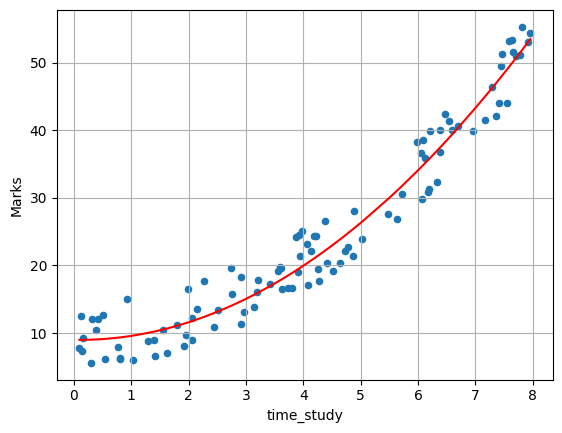

In [ ]:
# resultaat plotten

import matplotlib.pyplot as plt

df.plot.scatter(x='time_study', y='Marks')
xplot = np.sort(X, axis=0)
yplot = poly.predict(xplot)
plt.plot(xplot, yplot, 'r-');
plt.grid();

Pas nu zelf lineaire regressie toe, bereken de MAE, en plot het resultaat. Wat concludeer je? Welk van de twee modellen presteert het best? Hoe weet je dat?

---